### Preparations

In [1]:
### Importing Matplotlib (cannot be repeated in a Kernel)
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib._color_data as mcd
#%matplotlib inline

In [24]:
### Importing Other Packages

from matplotlib import animation

from jupyterthemes import jtplot
import numpy as np
# from sys import maxsize
# np.set_printoptions(threshold=maxsize)
import math
import scipy
from scipy import stats
from scipy.stats import skewnorm
import scipy.ndimage as ndimage
import pandas as pd
import netCDF4 as nc4
from netCDF4 import Dataset
from netCDF4 import num2date
import pickle
import datetime
import sys
sys.path.append('../misc')
from nc_dump import ncdump
import os
import time
from scipy.ndimage import zoom
#my scripts:
import importlib
#my scripts:
import tools_plot as jplt
importlib.reload(jplt) 
import tools_analysis as jan
importlib.reload(jan)   
%matplotlib inline
#%matplotlib notebook
#plt.style.use('dark_background')
#jtplot.style(theme='onedork')
#jtplot.reset()
#%load_ext ferretmagic
import csv
import scipy.stats as stats
from scipy.stats import truncnorm

#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import glob
%load_ext ferretmagic

The ferretmagic extension is already loaded. To reload it, use:
  %reload_ext ferretmagic


In [4]:
#Generate continental mask and store it
nc_f = '../climber/c3beta_tria_200Ma_1500ppm/snapshots.004002.01.01.dta.nc'  
nc_fid = Dataset(nc_f, 'r')  
#nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)
temp = np.flipud(nc_fid.variables['temp'][0,0,:,:])
mask=np.empty([48,96])
mask[np.where(temp > -1000)]=1
mask[np.where(temp < -1000)]=0
with open('../climber/continental_mask.pickle', 'wb') as f:  
   pickle.dump(mask, f)
with open('../climber/continental_mask.pickle', 'rb') as f:  
   continental_mask = pickle.load(f, encoding='latin1')

### Fig S1: Continental Configuration and Vegetation Pattern

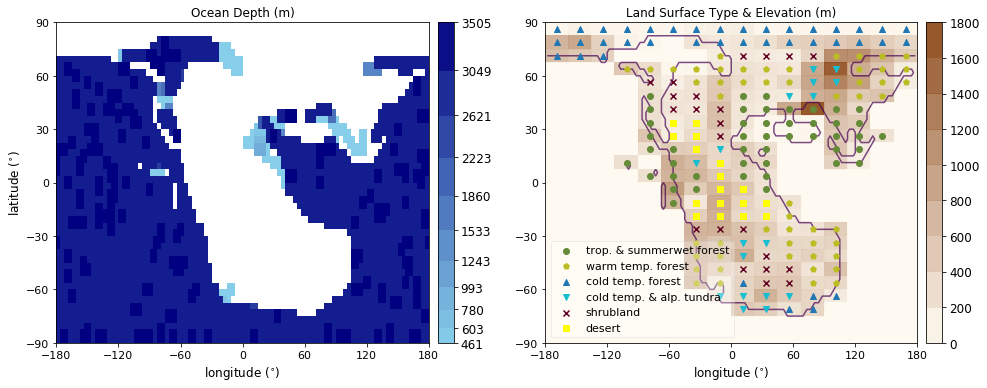

In [3]:
###Definition of the Grids
latas, lonas, xa, ya=jan.grid_gen(region='atmo', cell='T')
latos, lonos, xo, yo=jan.grid_gen(region='ocean', cell='T')
lataps, lonaps, xap, yap=jan.grid_gen(region='atmo', cell='p')
latops, lonops, xop, yop=jan.grid_gen(region='ocean', cell='p') 

##############################################################################
### Plot of Continents and Surface
##############################################################################

nc_f = '../climber/c3beta_tria_200Ma_1500ppm/snapshots_potsdam2.004002.01.01.dta.nc'  
p2snap = Dataset(nc_f, 'r') 
landfrac = np.flipud(np.mean(p2snap.variables['frlnd'][:,:,:],axis=0))
treefrac = np.around(np.flipud(np.mean(p2snap.variables['ft'][:,:,:],axis=0)),2) #percentages are not exactly as they should be
grassfrac = np.around(np.flipud(np.mean(p2snap.variables['fg'][:,:,:],axis=0)),2)
oro = np.flipud(np.mean(p2snap.variables['horo'][:,:,:].data,axis=0))
barefrac=1-(treefrac+grassfrac)
seafrac=1-landfrac

test=p2snap.variables['horo'][:,:,:].data

nc_f = '../climber/c3beta_tria_200Ma_1500ppm/topog.dta.nc'  
topog = Dataset(nc_f, 'r') 
ht = topog.variables['ht'][::-1,:]
zw_k=np.array(topog.variables['zw_k'][0:21])

#with open('landfrac.pickle', 'wb') as f:  
#    pickle.dump(landfrac, f)

#plot_world(oro, projection='rec', varname='oro',time='4100')
#plot_world(landfrac, projection='moll', varname='land fraction',time='4100') 
#plot_world(treefrac, projection='moll', varname='tree fraction',time='4100') 
#plot_world(grassfrac, projection='moll', varname='grass fraction',time='4100') 
#plot_world(barefrac, projection='moll', varname='bare soil fraction',time='4100') 

with open('../climber/continental_mask.pickle', 'rb') as f:  
    continental_mask = pickle.load(f, encoding='latin1')

lv = np.linspace(0.1,0.9,10)
cmTmp = plt.cm.gist_earth(lv)
newCmap = matplotlib.colors.ListedColormap(cmTmp)

#mycmap_blues= plt.cm.get_cmap('Blues',20)
#cm_blues = LinearSegmentedColormap.from_list('blues_jan', ['deepskyblue','navy'], N=20)
cmap_test=matplotlib.colors.LinearSegmentedColormap.from_list('blues_jan', ['skyblue','navy'], N=100)
#cm_blues=cmap_test(zw_k/zw_k[-1])
#newCmap = mcol.ListedColormap(cmap_test(1/(1-zw_k/zw_k[-1])))
norm = matplotlib.colors.BoundaryNorm(zw_k, cmap_test.N)
#https://matplotlib.org/tutorials/colors/colorbar_only.html


colors = [(0.27451,  0.50980,  0.70588), (0.80392,  0.52157,  0.24706)]  # R -> G -> B (139,69,19)
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'bluebrown'
cm = matplotlib.colors.LinearSegmentedColormap.from_list(cmap_name, colors, N=10)

colors = [(0.80392,  0.52157,  0.24706), (0.66275,  0.27059,  0.07451)]  # R -> G -> B (139,69,19)
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'brownbrown'
cm_oro = matplotlib.colors.LinearSegmentedColormap.from_list(cmap_name, colors, N=10)

vegetation_types=['trop. & summerwet forest', 'warm temp. forest','cold temp. forest', 'cold temp. & alp. tundra','shrubland', 'desert']
#vegetation_types=['tropical and summerwet forest', 'warm temperate forest','cold temperate forest', 'cold temperate and alpine tundra','shrubland', 'desert']
treefrac_types =[0.95, 0.75, 0.5, 0.25, 0,   0]
grassfrac_types=[0   , 0   , 0  , 0.25, 0.8, 0]
baresoil_types= [0.05, 0.25, 0.5, 0.5 , 0.2, 1]
marker_types   =['o', 'p', '^', 'v', 'x', 's']
marker_colors  =['xkcd:moss green','tab:olive','tab:blue','tab:cyan','xkcd:burgundy','yellow']

#plt.colors.Colormap(Oranges[,1])

fig8=plt.figure(8, figsize=(14, 5.5))
#fig8=plt.figure(8, figsize=(7.5,5.15))
#fig9=plt.figure(9, figsize=(7.5,5.15))
plt.clf()
ax81 = fig8.add_subplot(121)
ax82 = fig8.add_subplot(122)
#ax81 = fig8.add_subplot(111)
#ax82 = fig9.add_subplot(111)
ht_plot=ax81.pcolor(lonops, latops, ht/100, cmap=cmap_test, snap=True); #,vmin=0,vmax=3500
#ht_plot=ax81.pcolormesh(lonops, latops, ht/100, cmap=LinearSegmentedColormap.from_list('blues_jan', ['paleturquoise','navy'], N=100)); #,vmin=0,vmax=3500
oro_plot=ax82.pcolor(lonaps, lataps, oro, cmap=matplotlib.colors.LinearSegmentedColormap.from_list('browns_jan',['floralwhite','saddlebrown'], N=100), alpha=0.9,zorder=1); #, vmin=0,vmax=1
#ax8.pcolor(lonaps, lataps, np.ma.masked_where((oro<600), oro), cmap=cm_oro, vmin=40, vmax=np.max(oro), alpha=0.4,zorder=1); #make mpuntainous regions darker
ax82.contour(lonos,latos,continental_mask,levels=[0.5],zorder=2, alpha=0.7) 
#ax.contour(xo,yo,continental_mask,levels=[0.5], linewidths=1.75)
for i in range(len(treefrac_types)):
    s1 = ((treefrac==treefrac_types[i]) & (grassfrac==grassfrac_types[i]) & (landfrac!=0))
    ax82.scatter(xa[s1], ya[s1],marker=marker_types[i],c=marker_colors[i], label=vegetation_types[i],zorder=3)
    #ax82.scatter(xa[s1], ya[s1],marker=marker_types[i],c=marker_colors[i], label=vegetation_types[i]+' (%d,%d,%d)' % (100*treefrac_types[i],100*grassfrac_types[i],100*baresoil_types[i]),zorder=3)
ax82.legend(fontsize=11, ncol=1, framealpha=0.3)
ax81.set_title('Ocean Depth (m)'); ax81.set_xlabel(r'longitude ($^{\circ}$)', fontsize=12); ax81.set_ylabel(r'latitude ($^{\circ}$)', fontsize=12);
ax82.set_title('Land Surface Type & Elevation (m)', fontsize=12); ax82.set_xlabel(r'longitude ($^{\circ}$)', fontsize=12); #ax82.set_ylabel(r'latitude [$^{\circ}$]');
ax81.set_xticks(np.arange(-180,240,60)); ax81.set_yticks(np.arange(-90,120,30));
ax81.tick_params(labelsize=11); ax82.tick_params(labelsize=11);
ax82.set_xticks(np.arange(-180,240,60)); ax82.set_yticks(np.arange(-90,120,30));
cbar81=fig8.colorbar(ht_plot, ax=ax81, orientation='vertical', boundaries=zw_k[10:], norm=norm, ticks=zw_k[10:], spacing='proportional', pad=0.02)
cbar82=fig8.colorbar(oro_plot, ax=ax82, orientation='vertical', boundaries=np.arange(0,2000,200), pad=0.02)
cbar81.ax.set_yticklabels(cbar81.ax.get_yticklabels(), fontsize=12);
cbar82.ax.set_yticklabels(cbar82.ax.get_yticklabels(), fontsize=12);
plt.tight_layout()
fig8.savefig('./plot_pdf_files/FigS1_geography_vegetation.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

### Figs. S4a & S5: Equilibrium Surface Air Temperatures

In [5]:
%%ferret
!cancel data/all
use "../climber/c3beta_tria_200Ma_1500ppm/history_p2.nc"
!set viewport left
let var_ts_jja=ts_jja[k=1,l=3950:4000@ave]
!shade var
!set viewport right
let var_ts_djf=ts_djf[k=1,l=3950:4000@ave]
let var_ts_ann=ts_ann[k=1,l=3950:4000@ave]



In [6]:
%ferret_getdata var_ts_djf = var_ts_djf   
%ferret_getdata var_ts_jja = var_ts_jja 
%ferret_getdata var_ts_ann = var_ts_ann
ts_jja=np.rot90(var_ts_jja['data'][:,:,0,0,0,0])
ts_djf=np.rot90(var_ts_djf['data'][:,:,0,0,0,0])
ts_ann=np.rot90(var_ts_ann['data'][:,:,0,0,0,0])

Message: var_ts_djf is now available in python as a dictionary containing the variable's metadata and data array.

Message: var_ts_jja is now available in python as a dictionary containing the variable's metadata and data array.

Message: var_ts_ann is now available in python as a dictionary containing the variable's metadata and data array.

In [7]:
%%ferret
cancel data/all
use "../climber/c3beta_tria_200Ma_1500ppm/snapshots_potsdam2.004002.01.01.dta.nc"
!sh da
let ts_min_f=ts[l=@min]
let ts_max_f=ts[l=@max]

In [8]:
%ferret_getdata ts_min_f = ts_min_f  
%ferret_getdata ts_max_f = ts_max_f
ts_min=np.rot90(ts_min_f['data'][:,:,0,0,0,0])
ts_max=np.rot90(ts_max_f['data'][:,:,0,0,0,0])

Message: ts_min_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: ts_max_f is now available in python as a dictionary containing the variable's metadata and data array.

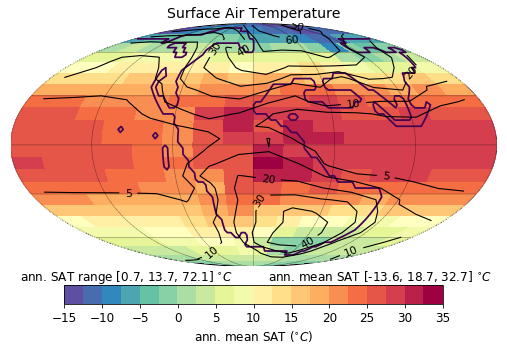

In [9]:
fig1=jplt.plot_world(ts_ann, varname='ann. mean SAT',  units='$^{\circ}C$', lim_l=-15, lim_u=35, cbar_delta=2.5, cbar_tick_freq=2,\
                     projection='moll', title='Surface Air Temperature', var_digits=1,\
                     cont='on', var_cont=ts_max-ts_min, var_cont_name='ann. SAT range', cont_levs=[5,10, 20, 30, 40, 50, 60], \
                     var_cont_unit='$^{\circ}C$', cont_label_fmt='%d', var_cont_digits=1)[1] 
#, lim_l=-40, lim_u=40, cbar_delta=2.5, cbar_tick_freq=4 , cont_levs=[-10, -5, 0, 5, 15, 20, 25, 30]
fig1.savefig('./plot_pdf_files/FigS4a_equi_1500ppm_SAT_ANN.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

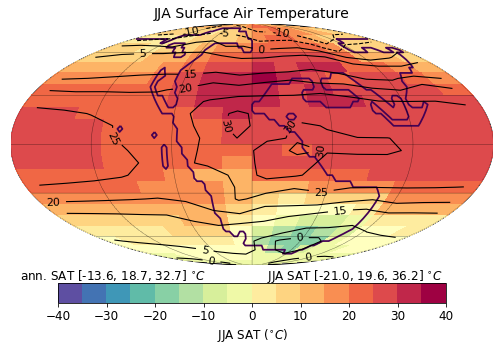

In [10]:
fig1=jplt.plot_world(ts_jja, varname='JJA SAT', lim_l=-40, lim_u=40, cbar_delta=5, cbar_tick_freq=2,  units='$^{\circ}C$',\
                     projection='moll', title='JJA Surface Air Temperature', var_digits=1,\
                     cont='on', var_cont=ts_ann, var_cont_name='ann. SAT', var_cont_digits=1,var_cont_unit='$^{\circ}C$', cont_levs=[-10, -5, 0, 5, 15, 20, 25, 30], cont_label_fmt='%d')[1] 
#, time='year 9' ,axorplt='ax', title='initial surface dp13 (for pulse_c_1500ppm_5300GtC_5ka)'jplt.plot_world(test, projection='moll', varname='dp13', time='year 9', units='permil', axes='on',axorplt='ax') # , title='initial surface dp13 (for pulse_c_1500ppm_5300GtC_5ka)'
fig1.savefig('./plot_pdf_files/FigS5a_equi_1500ppm_SAT_JJA.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

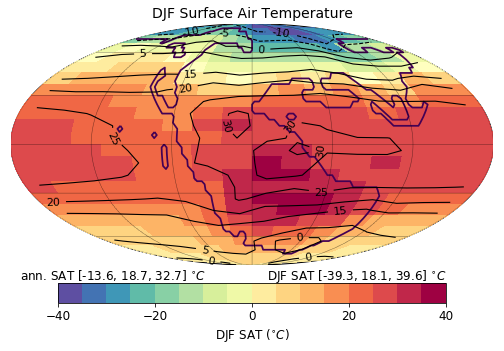

In [11]:
fig2=jplt.plot_world(ts_djf, varname='DJF SAT', lim_l=-40, lim_u=40, cbar_delta=5, cbar_tick_freq=4,  units='$^{\circ}C$',\
                     projection='moll', axes='on', title='DJF Surface Air Temperature', var_digits=1,\
                     cont='on', var_cont=ts_ann, var_cont_name='ann. SAT', var_cont_digits=1,var_cont_unit='$^{\circ}C$', cont_levs=[-10, -5, 0, 5, 15, 20, 25, 30], cont_label_fmt='%d')[1] 
fig2.savefig('./plot_pdf_files/FigS5b_equi_1500ppm_SAT_DJF.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

### Figs. S7, S8, S9: Equilibrium Precipitation, Sea Level Pressure, Surface Winds

In [12]:
%%ferret
cancel data/all
use "../climber/c3beta_tria_200Ma_1500ppm/history_p2.nc"
!sh da
let prc_ann_f=prc_ann[l=3970:4000@ave]
let e_ann_f=e_ann[l=3970:4000@ave]
let slp_djf_f=slp_djf[l=3970:4000@ave]
let slp_jja_f=slp_jja[l=3970:4000@ave]
let slp_jja_mean_f=slp_jja[i=@ave,j=@ave,l=3970:4000@ave];
let slp_djf_mean_f=slp_djf[i=@ave,j=@ave,l=3970:4000@ave];

In [13]:
%ferret_getdata prc_ann_f=prc_ann_f  
%ferret_getdata e_ann_f=e_ann_f 
%ferret_getdata slp_djf_f=slp_djf_f
%ferret_getdata slp_jja_f=slp_jja_f
%ferret_getdata slp_djf_mean_f=slp_djf_mean_f
%ferret_getdata slp_jja_mean_f=slp_jja_mean_f

prc_ann=np.rot90(prc_ann_f['data'][:,:,0,0,0,0])*360; 
e_ann=np.rot90(e_ann_f['data'][:,:,0,0,0,0])*360; 
slp_djf=np.rot90(slp_djf_f['data'][:,:,0,0,0,0]); 
slp_jja=np.rot90(slp_jja_f['data'][:,:,0,0,0,0]); 
slp_djf_mean=slp_djf_mean_f['data'][0,0,0,0,0,0]
slp_jja_mean=slp_jja_mean_f['data'][0,0,0,0,0,0]

Message: prc_ann_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: e_ann_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: slp_djf_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: slp_jja_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: slp_djf_mean_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: slp_jja_mean_f is now available in python as a dictionary containing the variable's metadata and data array.

In [14]:
%%ferret
use "../climber/c3beta_tria_200Ma_1500ppm/snapshots_potsdam2.004002.01.01.dta.nc"
!sh da
let u3d_f=u3d[k=10]
let v3d_f=v3d[k=10]
let slp_f=slp
! Zeitpunkt bei maximalem Niederschlag feststellen
!let a=prc[l=@max]-prc
!let var_prc_maxdate=(a[l=@loc:0]-1440000)/30
let slp_mean_f=slp[i=@ave,j=@ave];


In [15]:
%ferret_getdata u3d_f=u3d_f
%ferret_getdata v3d_f=v3d_f
%ferret_getdata slp_f=slp_f
%ferret_getdata slp_mean_f=slp_mean_f

u3d=np.rot90(u3d_f['data'][:,:,0,:,0,0]); u3d[u3d<-1e10]=0.
v3d=np.rot90(v3d_f['data'][:,:,0,:,0,0]); v3d[v3d<-1e10]=0.
slp=np.rot90(slp_f['data'][:,:,0,:,0,0]); 
slp_mean=slp_mean_f['data'][0,0,0,:,0,0]; 

#u3d_f['data'].shape

u3d_djf=(u3d[:,:,11]+u3d[:,:,0]+u3d[:,:,1])/3; v3d_djf=(v3d[:,:,11]+v3d[:,:,0]+v3d[:,:,1])/3
u3d_mam=np.mean(u3d[:,:,2:5], axis=2); v3d_mam=np.mean(v3d[:,:,2:5], axis=2)
u3d_jja=np.mean(u3d[:,:,5:8], axis=2); v3d_jja=np.mean(v3d[:,:,5:8], axis=2)
u3d_son=np.mean(u3d[:,:,8:11], axis=2); v3d_son=np.mean(v3d[:,:,8:11], axis=2)


slp_mam=np.mean(slp[:,:,2:4+1], axis=2);
slp_jja=np.mean(slp[:,:,5:7+1], axis=2); 
slp_son=np.mean(slp[:,:,8:10+1], axis=2); 
slp_djf=(slp[:,:,11]+slp[:,:,0]+slp[:,:,1])/3;

slp_mam_mean=np.mean(slp_mean[2:4+1]);
slp_jja_mean=np.mean(slp_mean[5:7+1]); 
slp_son_mean=np.mean(slp_mean[8:10+1]); 
slp_djf_mean=(slp_mean[11]+slp_mean[0]+slp_mean[1])/3;



Message: u3d_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: v3d_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: slp_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: slp_mean_f is now available in python as a dictionary containing the variable's metadata and data array.

In [16]:
%%ferret
cancel data/all
CANCEL MODE LOGO
palette default
use "../climber/c3beta_tria_200Ma_1500ppm/snapshots_potsdam2.004002.01.01.dta.nc"
use "../climber/c3beta_tria_200Ma_1500ppm/topog.dta.nc"
let cont_mask if kmt[d=2] gt 0 then 1 else 0
!set viewport ul
let prc_djf=(prc[l=1,d=1]+prc[l=2,d=1]+prc[l=12,d=1])/3
!shade/lev=(0,15,1)/nolabel/palette=inverse_bluescale prc_djf
!contour/overlay/noaxis/levels=2/color=black/nolabel cont_mask
!set viewport ur
let prc_mam=prc[l=3:5@ave,d=1]
!shade/lev=(0,15,1)/nolabel/palette=inverse_bluescale prc_mam
!contour/overlay/noaxis/levels=2/color=black/nolabel cont_mask
!set viewport ll
let prc_jja=prc[l=6:8@ave,d=1]
!shade/lev=(0,15,1)/nolabel/palette=inverse_bluescale prc_jja
!contour/overlay/noaxis/levels=2/color=black/nolabel cont_mask
!set viewport lr
let prc_son=prc[l=9:11@ave,d=1]
!shade/lev=(0,15,1)/nolabel/palette=inverse_bluescale prc_son
!contour/overlay/noaxis/levels=2/color=black/nolabel cont_mask
!FRAME/FILE="./pulse_1500ppm_PRC_seasonal.pdf"

In [17]:
%ferret_getdata prc_djf_f=prc_djf
%ferret_getdata prc_mam_f=prc_mam
%ferret_getdata prc_jja_f=prc_jja
%ferret_getdata prc_son_f=prc_son
prc_djf=np.rot90(prc_djf_f['data'][:,:,0,0,0,0]); 
prc_mam=np.rot90(prc_mam_f['data'][:,:,0,0,0,0]); 
prc_jja=np.rot90(prc_jja_f['data'][:,:,0,0,0,0]); 
prc_son=np.rot90(prc_son_f['data'][:,:,0,0,0,0]); 

Message: prc_djf_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: prc_mam_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: prc_jja_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: prc_son_f is now available in python as a dictionary containing the variable's metadata and data array.

In [18]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('Spectral')
new_cmap = truncate_colormap(cmap, 0.33, 1)

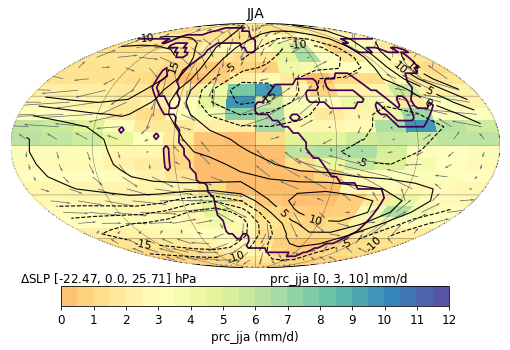

In [19]:
fig1=jplt.plot_world(prc_jja, varname='prc_jja', lim_l=0, lim_u=12, cbar_delta=0.5, cbar_tick_freq=2, units='mm/d',\
                     projection='moll', title='JJA', axes='on', anno='on', continents='on', continents_timeslice=201,colourmap=new_cmap, var_digits=0, \
                     cont='on', var_cont=slp_jja-slp_jja_mean, var_cont_name=r'$\Delta$SLP', cont_levs=[-15,-10,-5,0,5,10,15], cont_label_fmt='%d', var_cont_unit='hPa', \
                     vec='on', vectorx=u3d_jja, vectory=v3d_jja, vec_anno='off', vec_col='dimgrey', scat='off')[1]
fig1.savefig('./plot_pdf_files/FigS6a_prc_slp_wind_jja_rev.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

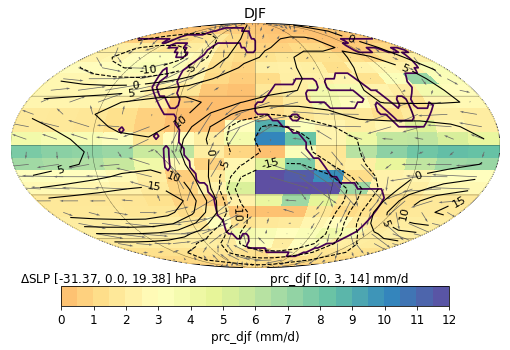

In [20]:
fig1=jplt.plot_world(prc_djf, varname='prc_djf', lim_l=0, lim_u=12, cbar_delta=0.5, cbar_tick_freq=2, units='mm/d',\
                     projection='moll', title='DJF', axes='on', anno='on', continents='on', continents_timeslice=201,colourmap=new_cmap, var_digits=0, \
                     cont='on', var_cont=slp_djf-slp_djf_mean, var_cont_name=r'$\Delta$SLP', cont_levs=[-15,-10,-5,0,5,10,15], cont_label_fmt='%d', var_cont_unit='hPa', \
                     vec='on', vectorx=u3d_djf, vectory=v3d_djf, vec_anno='off', vec_col='dimgrey', scat='off')[1]
fig1.savefig('./plot_pdf_files/FigS6b_prc_slp_wind_djf_rev.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

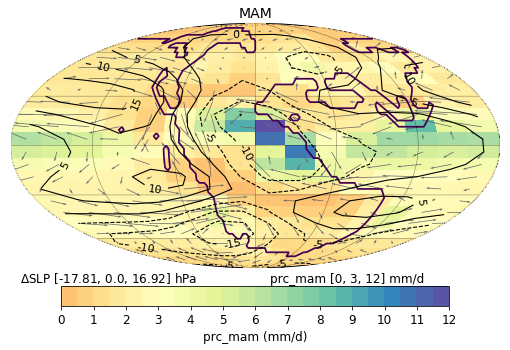

In [21]:
fig1=jplt.plot_world(prc_mam, varname='prc_mam', lim_l=0, lim_u=12, cbar_delta=0.5, cbar_tick_freq=2, units='mm/d',\
                     projection='moll', title='MAM', axes='on', anno='on', continents='on', continents_timeslice=201,colourmap=new_cmap, var_digits=0, \
                     cont='on', var_cont=slp_mam-slp_mam_mean, var_cont_name=r'$\Delta$SLP', cont_levs=[-15,-10,-5,0,5,10,15], cont_label_fmt='%d', var_cont_unit='hPa', \
                     vec='on', vectorx=u3d_mam, vectory=v3d_mam, vec_anno='off', vec_col='dimgrey', scat='off')[1]
fig1.savefig('./plot_pdf_files/FigS7a_prc_slp_wind_mam_rev.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

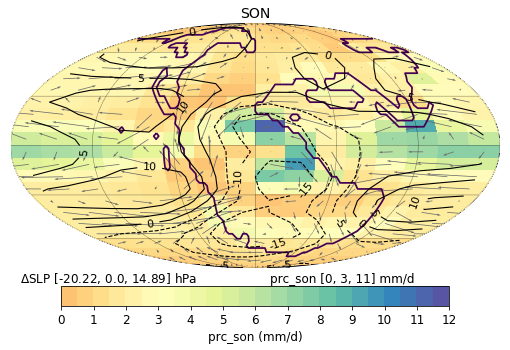

In [22]:
fig1=jplt.plot_world(prc_son, varname='prc_son', lim_l=0, lim_u=12, cbar_delta=0.5, cbar_tick_freq=2, units='mm/d',\
                     projection='moll', title='SON', axes='on', anno='on', continents='on', continents_timeslice=201,colourmap=new_cmap, var_digits=0, \
                     cont='on', var_cont=slp_son-slp_son_mean, var_cont_name=r'$\Delta$SLP', cont_levs=[-15,-10,-5,0,5,10,15], cont_label_fmt='%d', var_cont_unit='hPa', \
                     vec='on', vectorx=u3d_son, vectory=v3d_son, vec_anno='off', vec_col='dimgrey', scat='off')[1]
fig1.savefig('./plot_pdf_files/FigS7b_prc_slp_wind_son_rev.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

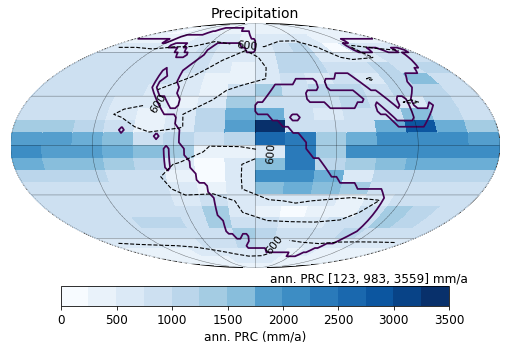

In [25]:
fig1=jplt.plot_world(prc_ann, lim_l=0, lim_u=3500, cbar_delta=250, varname='ann. PRC', units='mm/a', \
                     projection='moll', title='Precipitation', axes='on',colourmap='Blues', var_digits=0,\
                     cont='on', var_cont=prc_ann, cont_anno='off',cont_levs=[600], cont_labels='on', linestyle='dashed', cont_label_fmt='%d')[1] #(prc_ann-e_ann)/(prc_ann+e_ann), [0.2]
fig1.savefig('./plot_pdf_files/FigS8_equi_1500ppm_PRC_annual.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

### Fig. S9: Equilibrium Ocean Circulation and Temperatures

In [27]:
%%ferret
cancel data/all
use "../climber/c3beta_tria_200Ma_1500ppm/snapshots.004002.01.01.dta.nc"
!use "../climber/c3beta_tria_200Ma_1500ppm/history.nc"
!sh da
!list u[i=@ave,j=@ave,l=@ave]
let temp_f=temp[k=1,l=@ave]
let u_f=u[k=1,l=@ave]
let v_f=v[k=1,l=@ave]
let w_f=w[k=1,l=@ave]
!let prc_ann_f=prc_ann[l=3970:4000@ave]
!shade temp[k=1,l=@ave]
!cont/over/levels=10 temp[k=1,l=@ave]

In [28]:
%ferret_getdata temp_f=temp_f  
%ferret_getdata u_f=u_f 
%ferret_getdata v_f=v_f 
%ferret_getdata w_f=w_f

temp=np.ma.masked_values(np.rot90(temp_f['data'][:,:,0,0,0,0]), -1e34); 
u=np.ma.masked_values(np.rot90(u_f['data'][:,:,0,0,0,0]), -1e34); 
v=np.ma.masked_values(np.rot90(v_f['data'][:,:,0,0,0,0]), -1e34); 
w=np.ma.masked_values(np.rot90(w_f['data'][:,:,0,0,0,0]), -1e34); 

Message: temp_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: u_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: v_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: w_f is now available in python as a dictionary containing the variable's metadata and data array.

../misc/tools_plot.py:206: RuntimeWarning: invalid value encountered in sqrt
  vec_mean=np.ma.mean(np.sqrt(vectorx**2+vectory**2))


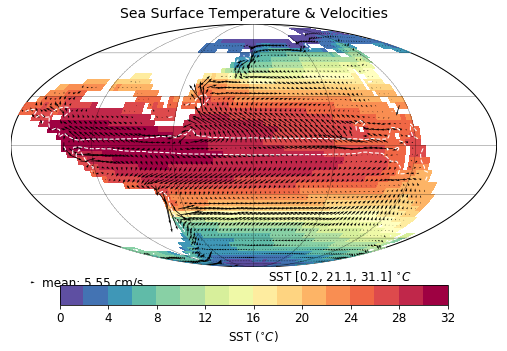

In [29]:
fig1=jplt.plot_world(temp, varname='SST', units='$^{\circ}C$', cbar_delta=2, lim_l=0, lim_u=32, \
                     projection='moll', title='Sea Surface Temperature & Velocities', axes='on', rotate='yes', var_digits=1,\
                     cont='on', var_cont=w, cont_levs=[0.0001], cont_anno='off', cont_labels='off', linestyle='dashed', cont_col='w', \
                     vec='on', vectorx=u, vectory=v, vec_freq=1)[1] 
fig1.savefig('./plot_pdf_files/FigS9a_equi_1500ppm_SST.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

In [30]:
%%ferret
cancel data/all
use "../climber/c3beta_tria_200Ma_1500ppm/snapshots.004002.01.01.dta.nc"

!sh da
!list temp[i=0, j=@ave, k=@ave,l=@ave]
let temp_f=temp[i=0,l=@ave,d=1]
!shade temp[i=0,l=@ave]

!show axis/all

use "../climber/c3beta_tria_200Ma_1500ppm/history.nc"
let glb_over_f=glb_over[l=3970:4000@ave]
!shade/palette=rainbow/vlimits=0:3500 glb_over[l=3970:4000@ave]

In [31]:
%ferret_getdata temp_f=temp_f 
%ferret_getdata glb_over_f=glb_over_f
temp=np.ma.masked_values(np.rot90(temp_f['data'][0,:,::-1,0,0,0]), -1e34);
glb_over=np.ma.masked_values(np.rot90(glb_over_f['data'][0,:,::-1,0,0,0]), -1e34);
#temp=np.ma.masked_values(np.rot90(temp_f['data'][:,0,:,0,0,0]), -1e34);
#temp

Message: temp_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: glb_over_f is now available in python as a dictionary containing the variable's metadata and data array.

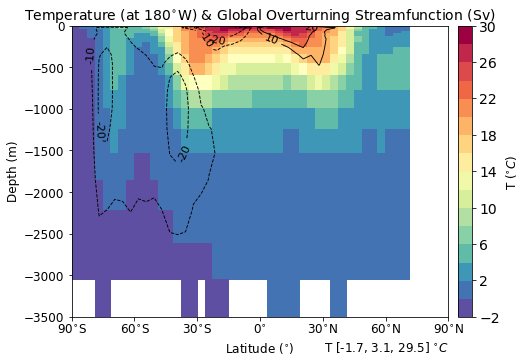

In [34]:
fig1=jplt.plot_cross(temp, lim_l=-2, lim_u=30, cbar_delta=2, varname='T', units='$^{\circ}C$', \
                     axes='on', title='Temperature (at 180$^{\circ}$W) & Global Overturning Streamfunction (Sv)', var_digits=1,\
                     cont='on', var_cont=glb_over, var_cont_name='OVER', var_cont_unit='Sv', cont_anno='off', cont_levs=[-20,-10,10,20],cont_label_fmt='%d')[1]
fig1.savefig('./plot_pdf_files/FigS9b_equi_1500ppm_OceanTemp_Cross.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

### Figs. S10 and S11: Equilibrium Marine Biogeochemistry

In [35]:
%%ferret
cancel data/all
use "../climber/c3beta_tria_200Ma_biogeo_pulse_1500ppm_restart/snapshots.013600.01.01.dta.nc"
use "../climber/c3beta_tria_200Ma_biogeo_pulse_1500ppm_restart/all_snapshots_mom_annual.nc"
!sh da
!shade dust[k=1,l=@ave,d=1]
let oxy_f=tracer_05[k=@min,l=48:50@ave]
let oxy_cross_f=tracer_05[i=24,l=48:50@ave]
let v_cross_f=v[i=24,l=48:50@ave]
let w_cross_f=w[i=24,l=48:50@ave]
let phosph_cross_f=tracer_06[i=24,l=48:50@ave]
let proyear_f=proyear[l=@sum,d=1]
!list proyear[i=@din, j=@din, l=@sum,d=1]
!shade proyear[l=1,d=1]
let omegaplo_a_f=omegaplo_a[k=1,l=48:50@ave]
!list omegaplo_a[k=1, i=@ave,y=30S:30N@ave,l=48:50@ave]
let ph_f=ph[k=1,l=48:50@ave]
let dp13_f=dp13[k=1,l=48:50@ave]
let dc13_f=dc13[k=1,l=48:50@ave]


In [36]:
%ferret_getdata oxy_f=oxy_f
%ferret_getdata oxy_cross_f=oxy_cross_f
%ferret_getdata phosph_cross_f=phosph_cross_f
%ferret_getdata v_cross_f=v_cross_f
%ferret_getdata w_cross_f=w_cross_f
%ferret_getdata proyear_f=proyear_f
%ferret_getdata ph_f=ph_f
%ferret_getdata omegaplo_a_f=omegaplo_a_f
%ferret_getdata dp13_f=dp13_f
%ferret_getdata dc13_f=dc13_f
oxy=np.ma.masked_values(np.rot90(oxy_f['data'][:,:,0,0,0,0]), -1e34);
oxy_cross=np.ma.masked_values(np.rot90(oxy_cross_f['data'][0,:,::-1,0,0,0]), -1e34);
phosph_cross=np.ma.masked_values(np.rot90(phosph_cross_f['data'][0,:,::-1,0,0,0]), -1e34);
v_cross=np.ma.masked_values(np.rot90(v_cross_f['data'][0,:,::-1,0,0,0]), -1e34);
w_cross=np.ma.masked_values(np.rot90(w_cross_f['data'][0,:,::-1,0,0,0]), -1e34);
proyear=np.ma.masked_values(np.rot90(proyear_f['data'][:,:,0,0,0,0]), -1e34);
omegaplo_a=np.ma.masked_values(np.rot90(omegaplo_a_f['data'][:,:,0,0,0,0]), -1e34)
ph=np.ma.masked_values(np.rot90(ph_f['data'][:,:,0,0,0,0]), -1e34)
dp13=np.ma.masked_values(np.rot90(dp13_f['data'][:,:,0,0,0,0]), -1e34)
dc13=np.ma.masked_values(np.rot90(dc13_f['data'][:,:,0,0,0,0]), -1e34)
#temp=np.ma.masked_values(np.rot90(temp_f['data'][:,0,:,0,0,0]), -1e34);
#temp

Message: oxy_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: oxy_cross_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: phosph_cross_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: v_cross_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: w_cross_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: proyear_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: ph_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: omegaplo_a_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: dp13_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: dc13_f is now available in python as a dictionary containing the variable's metadata and data array.

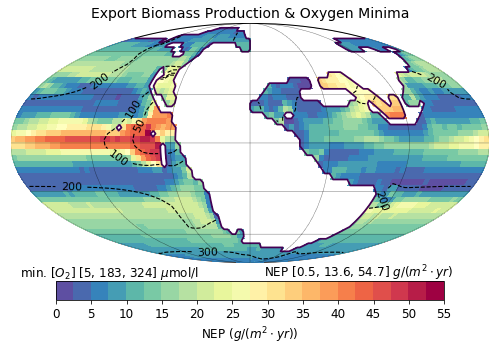

In [37]:
fig1=jplt.plot_world(proyear, varname='NEP', units='$g/(m^2\cdot yr)$', lim_l=0, lim_u=55, cbar_delta=2.5, \
                     projection='moll', title='Export Biomass Production & Oxygen Minima', axes='on', continents='on', var_digits=1,\
                     cont='on', cont_label_fmt='%d', var_cont=oxy, var_cont_name='min. [$O_2$]', var_cont_unit='$\mu \mathrm{mol/l}$', \
                     cont_labels='on', cont_levs=[50,100,200,300], linestyle='dashed', var_cont_digits=0)[1] #, lim_l=0, lim_u=32
#, cont_levs=[0.0001]
fig1.savefig('./plot_pdf_files/FigS11a_equi_1500ppm_PROYEAR.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)


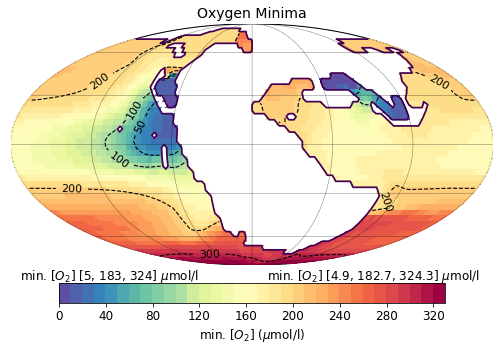

In [38]:
fig1=jplt.plot_world(oxy, varname='min. [$O_2$]', units='$\mu \mathrm{mol/l}$', lim_l=0, lim_u=325, cbar_delta=10, cbar_tick_freq=4, \
                     projection='moll', title='Oxygen Minima', axes='on', continents='on', var_digits=1,\
                     cont='on', cont_label_fmt='%d', var_cont=oxy, var_cont_name='min. [$O_2$]', var_cont_unit='$\mu \mathrm{mol/l}$', \
                     cont_labels='on', cont_levs=[50,100,200,300], linestyle='dashed', var_cont_digits=0)[1] #, lim_l=0, lim_u=32
#, cont_levs=[0.0001]
fig1.savefig('./equi_1500ppm_OXY_min.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

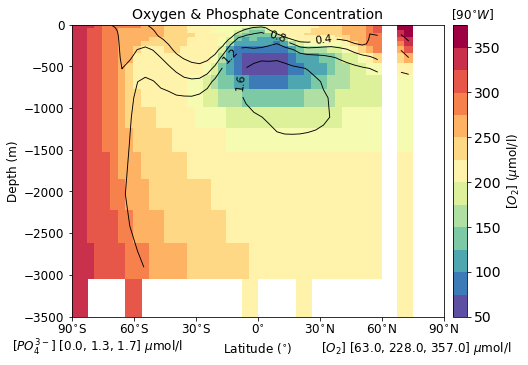

In [39]:
fig1=jplt.plot_cross(oxy_cross,axes='on', title='Oxygen & Phosphate Concentration', varname='[$O_2$]', units='$\mu \mathrm{mol/l}$', \
                     lim_l=60, lim_u=360, cbar_delta=25, var_digits=0,\
                      crosssec_loc='90$^{\circ}W$', \
                        cont='on', var_cont=phosph_cross, cont_levs=[0.4, 0.8,1.2,1.6], var_cont_name='[$PO_4^{3-}$]', \
                     var_cont_unit='$\mu \mathrm{mol/l}$', cont_label_fmt='%.1f', var_cont_digits=1)[1]
fig1.savefig('./plot_pdf_files/FigS10b_equi_1500ppm_OXY_Cross.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)

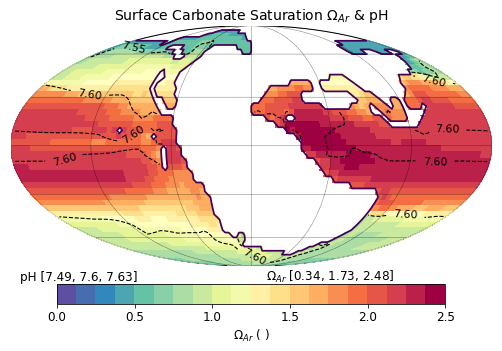

In [40]:
fig1=jplt.plot_world(omegaplo_a, varname='$\Omega_{Ar}$', lim_l=0, lim_u=2.5, cbar_delta=0.125, cbar_tick_freq=4, units=' ',\
                     projection='moll', title='Surface Carbonate Saturation $\Omega_{Ar}$ & pH', axes='on', continents='on',\
                     cont='on', var_cont=ph, var_cont_name='pH', var_cont_unit=' ', cont_levs=[7.55, 7.6], cont_labels='on', linestyle='dashed')[1] #, lim_l=0, lim_u=32
fig1.savefig('./plot_pdf_files/FigS10a_equi_1500ppm_OMEGA.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)


### Sensitivity to pCO_2

In [41]:
%%ferret
cancel data/all
use "../climber/c3beta_tria_200Ma_1000ppm/history_p2.nc"
use "../climber/c3beta_tria_200Ma_1500ppm/history_p2.nc"
use "../climber/c3beta_tria_200Ma_2000ppm/history_p2.nc"
use "../climber/c3beta_tria_200Ma_1000ppm/snapshots_potsdam2.004001.01.01.dta.nc"
use "../climber/c3beta_tria_200Ma_1500ppm/snapshots_potsdam2.004002.01.01.dta.nc"
use "../climber/c3beta_tria_200Ma_2000ppm/snapshots_potsdam2.004001.01.01.dta.nc"
use "../climber/c3beta_tria_200Ma_1000ppm/history_isis.nc"
use "../climber/c3beta_tria_200Ma_1500ppm/history_isis.nc"
use "../climber/c3beta_tria_200Ma_2000ppm/history_isis.nc"
!shade ts_ann[k=10,l=3970:4000@ave ,d=1]
let sat_grad_1000_f=ts_ann[i=@ave,l=3970:4000@ave,d=1]
let sat_grad_1500_f=ts_ann[i=@ave,l=3970:4000@ave,d=2]
let sat_grad_2000_f=ts_ann[i=@ave,l=3970:4000@ave,d=3]
let htrop_1000_f=htrop[i=@ave,l=@ave,d=4]
let htrop_1500_f=htrop[i=@ave,l=@ave,d=5]
let htrop_2000_f=htrop[i=@ave,l=@ave,d=6]
let icefrac_1000_f=con_g[i=@ave,l=3970:4000@ave,d=7]
let icefrac_1500_f=con_g[i=@ave,l=3970:4000@ave,d=8]
let icefrac_2000_f=con_g[i=@ave,l=3970:4000@ave,d=9]
!plot icefrac_1500_f

In [42]:
%ferret_getdata sat_grad_1000_f=sat_grad_1000_f
%ferret_getdata sat_grad_1500_f=sat_grad_1500_f
%ferret_getdata sat_grad_2000_f=sat_grad_2000_f
%ferret_getdata htrop_1000_f=htrop_1000_f
%ferret_getdata htrop_1500_f=htrop_1500_f
%ferret_getdata htrop_2000_f=htrop_2000_f
%ferret_getdata icefrac_1000_f=icefrac_1000_f
%ferret_getdata icefrac_1500_f=icefrac_1500_f
%ferret_getdata icefrac_2000_f=icefrac_2000_f
#sat_grad_1000_f
sat_grad_1000=sat_grad_1000_f['data'][0,::-1,0,0,0,0]
sat_grad_1500=sat_grad_1500_f['data'][0,::-1,0,0,0,0]
sat_grad_2000=sat_grad_2000_f['data'][0,::-1,0,0,0,0]
htrop_1000=htrop_1000_f['data'][0,::-1,0,0,0,0]
htrop_1500=htrop_1500_f['data'][0,::-1,0,0,0,0]
htrop_2000=htrop_2000_f['data'][0,::-1,0,0,0,0]
icefrac_1000=np.ma.masked_values(icefrac_1000_f['data'][0,::-1,0,0,0,0], -1e34)
icefrac_1500=np.ma.masked_values(icefrac_1500_f['data'][0,::-1,0,0,0,0], -1e34)
icefrac_2000=np.ma.masked_values(icefrac_2000_f['data'][0,::-1,0,0,0,0], -1e34)


Message: sat_grad_1000_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: sat_grad_1500_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: sat_grad_2000_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: htrop_1000_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: htrop_1500_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: htrop_2000_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: icefrac_1000_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: icefrac_1500_f is now available in python as a dictionary containing the variable's metadata and data array.

Message: icefrac_2000_f is now available in python as a dictionary containing the variable's metadata and data array.

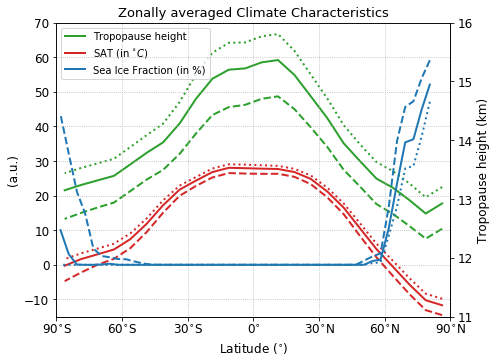

In [43]:
### Plot zonal mean SAT, Tropopause Height and Sea Ice Fraction
fig10=plt.figure(figsize=(7.0,5.15))
plt.clf()
ax10 = fig10.add_subplot(111) 
ax10.patch.set_visible(False)
ax10.set_zorder(10)
ax11 = ax10.twinx()
ax10.grid(linestyle=':', zorder=0) 

lats=jan.grid_gen(region='atmo', cell='T')[0]
lats_o=jan.grid_gen(region='ocean', cell='T')[0]

ax10.plot(lats, sat_grad_1000,'--',c='tab:red',lw=2, zorder=4) 
ax10.plot(lats, sat_grad_1500,'-',c='tab:red',lw=2, label='SAT (in $^{\circ}C$)', zorder=4) 
ax10.plot(lats, sat_grad_2000,':',c='tab:red',lw=2, zorder=4) 
ax11.plot(lats, htrop_1000/1000,'--',c='tab:green',lw=2, zorder=4) 
ax11.plot(lats, htrop_1500/1000,'-',c='tab:green',lw=2, label='Tropopause height', zorder=4) 
ax11.plot(lats, htrop_2000/1000,':',c='tab:green',lw=2, zorder=4) 
ax10.plot(lats_o, icefrac_1000*100,'--',c='tab:blue',lw=2, zorder=4) 
ax10.plot(lats_o, icefrac_1500*100,'-',c='tab:blue',lw=2, label='Sea Ice Fraction (in %)', zorder=4) 
ax10.plot(lats_o, icefrac_2000*100,':',c='tab:blue',lw=2, zorder=4) 
# ax10.plot(pco2, sst_trop_pco2,'o-',c='tab:red',lw=2, label='trop. SST', zorder=4) #/np.max(sst_trop_pco2)
# ax10.plot(pco2, sst_extratrop_pco2,'o-',c='tab:blue',lw=2, label='extratrop. SST', zorder=4) #/np.max(sst_extratrop_pco2)
# ax11.plot(pco2,hmxl_pco2/np.max(hmxl_pco2), '--ko',lw=2, label='mixed layer depth (max: %d m)' % np.max(hmxl_pco2), zorder=2) 
# ax11.plot(pco2,glb_over_pco2/np.max(glb_over_pco2), ':ko',lw=2, label='Overturning (max: %.1f Sv)' % np.max(glb_over_pco2), zorder=2) 


h2, l2 = ax10.get_legend_handles_labels()
h1, l1 = ax11.get_legend_handles_labels()
ax11.legend(h1+h2, l1+l2, loc='upper left', ncol=1, fontsize=10) #(0.25,0.25)

ax10.tick_params(labelsize=12)
ax11.tick_params(labelsize=12)
plt.xticks([-90,-60,-30,0,30,60,90],['90$^{\circ}$S','60$^{\circ}$S','30$^{\circ}$S','0$^{\circ}$','30$^{\circ}$N','60$^{\circ}$N','90$^{\circ}$N']);
ax10.set_xlim([-90,90]); ax10.set_ylim([-15,70])
ax11.set_ylim([11,16])
#ax11.set_yticks([12,13,14,15,16])
ax10.set_title('Zonally averaged Climate Characteristics', fontsize=13)
ax10.set_ylabel('(a.u.)', fontsize=12)
ax10.set_xlabel('Latitude ($^{\circ}$)', fontsize=12); 
ax11.set_ylabel(r'Tropopause height (km)', fontsize=12)
plt.tight_layout()

fig10.savefig('./plot_pdf_files/FigS4a_equi_SAT_HTROP_ICE_zonally.pdf',bbox_inches='tight', pad_inches=0.01, dpi=900)